In [281]:
import numpy as np
from BP_reward import get_reward
import random
import matplotlib.pyplot as plt
import scipy.stats as st

In [282]:
student_id = 810199296

## Q2

### Doctor A

In [283]:
def Doctor_A(): 
    Rewards = []  
    SumReward = []
    summ = 0
    all_actions = [1,2]
    action = random.choice([1, 2])
    r = get_reward(action , student_id)

    for i in range(100):
        
        if r>0:
            
            other_action = [i for i in all_actions if i != action][0]
            r = get_reward(action , student_id)
            next_action = random.choices([action,other_action], [0.8,0.2])

        else:
            other_action = [i for i in all_actions if i != action][0]
            r = get_reward(action , student_id)
            next_action = random.choices([action,other_action], [0.3,0.7])
            
        action = next_action[0]
        summ += r  
        Rewards.append(r)
        SumReward.append(summ)

    return SumReward,Rewards


### Doctor B

In [284]:
def Doctor_B():   
    SumReward = []
    Rewards = []  
    summ = 0
    for i in range(100):
        action = random.choice([1, 2])
        r = get_reward(action , student_id)
        summ += r  
        SumReward.append(summ)
        Rewards.append(r)
        
    return SumReward,Rewards

### Doctor C

In [285]:
def Doctor_C():   
    SumReward = []
    summ = 0
    Rewards = []
    actionRewards = []
   
    for i in range(100):
        
        if i>=20 :
            if i%10 in [7,8,9]:
                action = random.choice([1, 2])
                r = get_reward(action , student_id)

            else:
                x = np.argmax(Rewards) 
                action = actionRewards[x]

                
        else:    
            if (0<=i <=9) :
                action = 1
                r = get_reward(action , student_id)
                
                
            elif (10<=i <=19):
                action = 2
                r = get_reward(action , student_id)
                


        summ += r  
        SumReward.append(summ)
        Rewards.append(r)
        actionRewards.append(action)
    
    return SumReward,Rewards
        

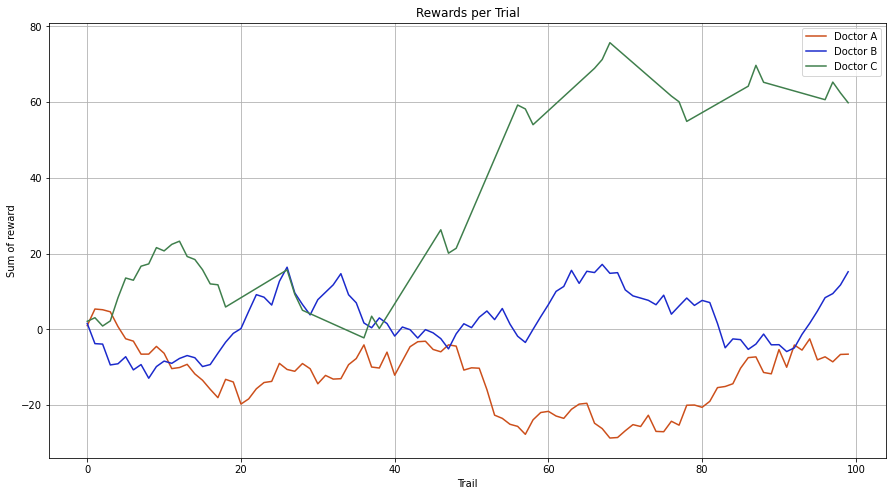

In [286]:
plt.figure(figsize=(15,8))
Sum_reward_A,_ = Doctor_A()
Sum_reward_B,_ = Doctor_B()
Sum_reward_C,_= Doctor_C()
plt.plot(Sum_reward_A,label = 'Doctor A', color='#CC4F1B')
plt.plot(Sum_reward_B,label = 'Doctor B', color='#1B2ACC')
plt.plot(Sum_reward_C,label = 'Doctor C', color='#3F7F4C')
plt.xlabel('Trail')
plt.ylabel("Sum of reward")
plt.title("Rewards per Trial")
plt.legend()
plt.grid()

## Q3

In [287]:
def summ_rewards_and_mean(repeat):

    Sum_Rewards_A = []
    Sum_Rewards_B = []
    Sum_Rewards_C = []

    for i in range(repeat):

        Sum_reward_A,_ = Doctor_A()
        Sum_Rewards_A.append(Sum_reward_A)
        Sum_reward_B,_ = Doctor_B()
        Sum_Rewards_B.append(Sum_reward_B)
        Sum_reward_C,_ = Doctor_C()
        Sum_Rewards_C.append(Sum_reward_C)

    Mean_A = np.mean(Sum_Rewards_A, axis = 0)
    Mean_B = np.mean(Sum_Rewards_B, axis = 0)
    Mean_C = np.mean(Sum_Rewards_C, axis = 0)

    return Sum_Rewards_A,Sum_Rewards_B,Sum_Rewards_C,Mean_A,Mean_B,Mean_C


In [289]:
def Caculate_CI_and_Error(n,Sum_Rewards) :
       
    error_list = []
    alpha = 0.05
    df = n - 1
    for i in range(100):
        arr = np.array(Sum_Rewards)[:,i]
        x_bar = np.mean(arr)
        s = np.std(arr,ddof=1)
        se = s/np.sqrt(n)
        t_star = st.t.ppf(1-alpha, df)
        CI_up = x_bar + (t_star*se)
        error_list.append(CI_up-x_bar)
    return error_list

### repeat = 5 

In [290]:
repeat = 5
Sum_Rewards_A,Sum_Rewards_B,Sum_Rewards_C,Mean_A,Mean_B,Mean_C= summ_rewards_and_mean(repeat)
error_list_A =Caculate_CI_and_Error(repeat,Sum_Rewards_A)
error_list_B =Caculate_CI_and_Error(repeat,Sum_Rewards_B)
error_list_C =Caculate_CI_and_Error(repeat,Sum_Rewards_C)

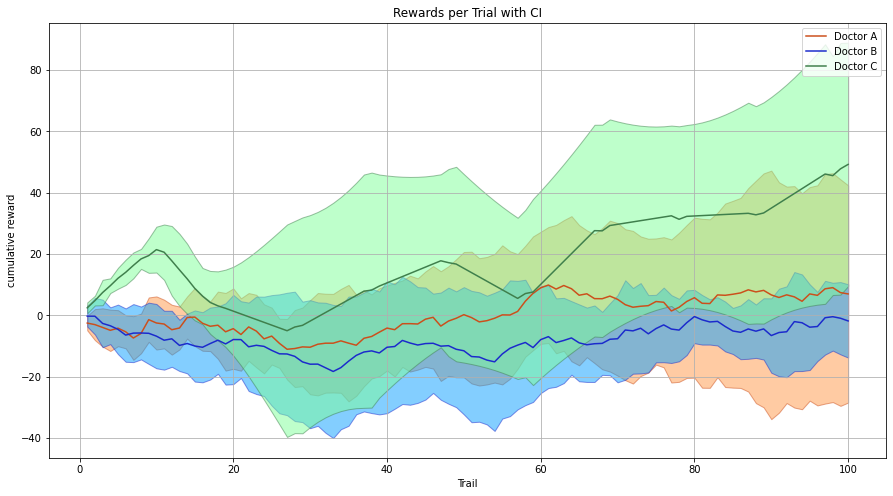

In [291]:
plt.figure(figsize=(15,8))
plt.plot(range(1,101), Mean_A, 'k-', color='#CC4F1B',label = 'Doctor A')
plt.fill_between(range(1,101), Mean_A-error_list_A, Mean_A+error_list_A,alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
plt.plot(range(1,101), Mean_B, 'k-', color='#1B2ACC',label = 'Doctor B')
plt.fill_between(range(1,101), Mean_B-error_list_B, Mean_B+error_list_B,alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.plot(range(1,101), Mean_C, 'k-', color='#3F7F4C',label = 'Doctor C')
plt.fill_between(range(1,101), Mean_C-error_list_C, Mean_C+error_list_C,alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.xlabel('Trail')
plt.ylabel("cumulative reward")
plt.title("Rewards per Trial with CI")
plt.legend()
plt.grid()
plt.show()

### repeat = 20

In [292]:
repeat = 20
Sum_Rewards_A,Sum_Rewards_B,Sum_Rewards_C,Mean_A,Mean_B,Mean_C= summ_rewards_and_mean(repeat)
error_list_A =Caculate_CI_and_Error(repeat,Sum_Rewards_A)
error_list_B =Caculate_CI_and_Error(repeat,Sum_Rewards_B)
error_list_C =Caculate_CI_and_Error(repeat,Sum_Rewards_C)

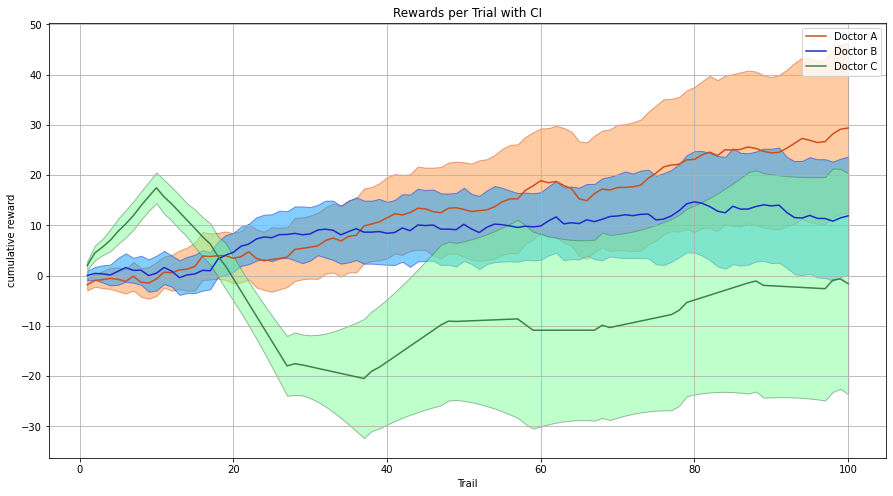

In [293]:
plt.figure(figsize=(15,8))
plt.plot(range(1,101), Mean_A, 'k-', color='#CC4F1B',label = 'Doctor A')
plt.fill_between(range(1,101), Mean_A-error_list_A, Mean_A+error_list_A,alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
plt.plot(range(1,101), Mean_B, 'k-', color='#1B2ACC',label = 'Doctor B')
plt.fill_between(range(1,101), Mean_B-error_list_B, Mean_B+error_list_B,alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.plot(range(1,101), Mean_C, 'k-', color='#3F7F4C',label = 'Doctor C')
plt.fill_between(range(1,101), Mean_C-error_list_C, Mean_C+error_list_C,alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.xlabel('Trail')
plt.ylabel("cumulative reward")
plt.title("Rewards per Trial with CI")
plt.legend()
plt.grid()
plt.show()

## Q4

In [294]:
repeat = 10
Sum_Rewards_A,Sum_Rewards_B,Sum_Rewards_C,Mean_A,Mean_B,Mean_C= summ_rewards_and_mean(repeat)

In [295]:
last_p_d_A = []
last_p_d_B = []
last_p_d_C = []

for i in range(10):

    last_p_d_A.append(Sum_Rewards_A[i][-1])
    last_p_d_B.append(Sum_Rewards_B[i][-1])
    last_p_d_C.append(Sum_Rewards_C[i][-1])
    

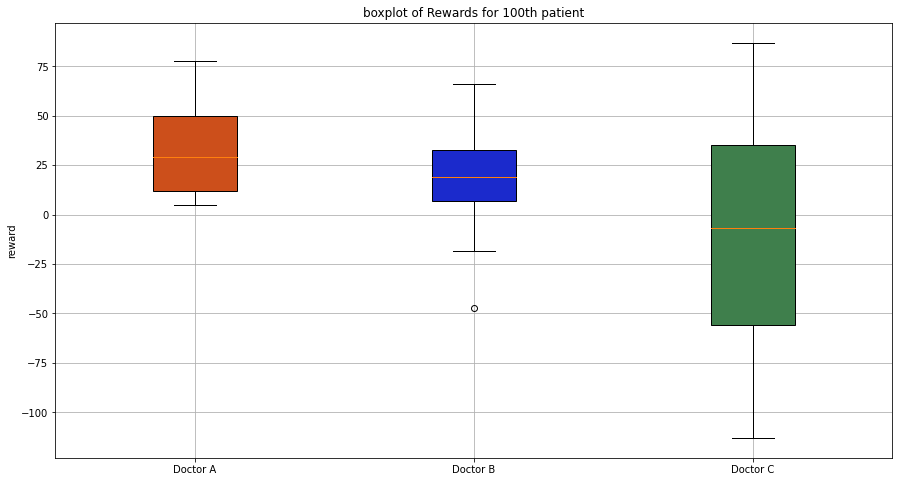

In [296]:
data = [last_p_d_A, last_p_d_B, last_p_d_C]
plt.figure(figsize=(15,8))
box = plt.boxplot(data, patch_artist=True)
colors = ['#CC4F1B','#1B2ACC', '#3F7F4C']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.grid()
plt.xticks([1, 2, 3], ['Doctor A', 'Doctor B','Doctor C'])
plt.ylabel("reward")
plt.title('boxplot of Rewards for 100th patient')
plt.show()

## Q5

In [297]:
drug_one = []
drug_two = []

for i in range(100):
    
    drug_one.append(get_reward(1 , student_id))
    drug_two.append(get_reward(2 , student_id))


In [298]:
n = 100

x_bar_d_1 = np.mean(drug_one)
x_bar_d_2 = np.mean(drug_two)
mean_differences = x_bar_d_1 - x_bar_d_2
s_1 = np.std(drug_one,ddof=1)
s_2 = np.std(drug_two,ddof=1)
se = np.sqrt(( np.power(s_1,2) / n ) + ( np.power(s_2,2) / n))
z = (mean_differences-0)/se
p = st.norm.cdf(z)
p_value = 1 - p
print("p_value :",p_value)


p_value : 0.0
